In [ ]:
import percolation
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(100, 400)
X_inf = np.arange(0, 18, 3)
print (X)
Y = []
#for x in X_inf:
  #Y = []
for m in X:
  Y.append(percolation.calculateFinalInfection(3, 100, m, 100, 0.7, 0.3))

plt.plot(X, Y)
plt.xlabel('Number of Edges')
plt.ylabel('Total Number of Infected Nodes')
plt.legend()
plt.title("Infection spread for different number of edges (number of nodes is 20).")

Text(0.5, 1.0, 'Infection Spread for Different Average Node Degrees')

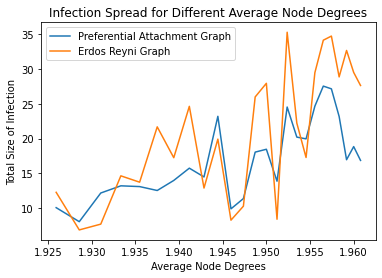

In [26]:
import graphs
import percolation
import random
import numpy as np
import matplotlib.pyplot as plt

number_of_nodes = 50
X = []
pref_attachment = []
erdos_renyi = []

for i in range(25, number_of_nodes):

    X.append((2 + 2*i)/(i + 2))

    graph1 = graphs.pref_attachment([[0,1], [1,0]], [0,1], 2, i) 
    numInfected1 = percolation.calculateFinalInfection(i + 2, 1, graph1, 100,  0.9, 0.1)
    pref_attachment.append(numInfected1)

    graph2 = graphs.erdos_renyi_graph(i + 2, len(graph1))
    numInfected2 = percolation.calculateFinalInfection(i + 2, 1, graph2, 100, 0.9, 0.1)
    erdos_renyi.append(numInfected2)    


plt.plot(X, pref_attachment, label="Preferential Attachment Graph")
plt.plot(X, erdos_renyi, label="Erdos Reyni Graph")
plt.legend()
plt.xlabel('Average Node Degrees')
plt.ylabel('Total Size of Infection')
plt.title('Infection Spread for Different Average Node Degrees')




Text(0.5, 1.0, 'Infection Spread for Different Average Node Degrees')

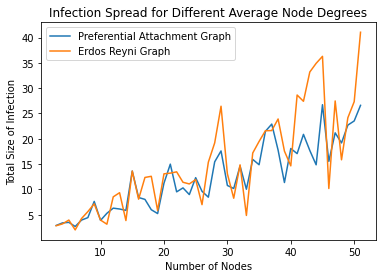

In [25]:
import graphs
import percolation
import random
import numpy as np
import matplotlib.pyplot as plt

number_of_nodes = 50
X = []
pref_attachment = []
erdos_renyi = []

for i in range(1, number_of_nodes):

    X.append(i + 2)

    graph1 = graphs.pref_attachment([[0,1], [1,0]], [0,1], 2, i) 
    numInfected1 = percolation.calculateFinalInfection(i + 2, 1, graph1, 100,  0.9, 0.1)
    pref_attachment.append(numInfected1)

    graph2 = graphs.erdos_renyi_graph(i + 2, len(graph1))
    numInfected2 = percolation.calculateFinalInfection(i + 2, 1, graph2, 100, 0.9, 0.1)
    erdos_renyi.append(numInfected2)    


plt.plot(X, pref_attachment, label="Preferential Attachment Graph")
plt.plot(X, erdos_renyi, label="Erdos Reyni Graph")
plt.legend()
plt.xlabel('Number of Nodes')
plt.ylabel('Total Size of Infection')
plt.title('Infection Spread for Different Average Node Degrees')